<a href="https://colab.research.google.com/github/kingketan9/Machine-Learning/blob/main/Facial_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/drive/MyDrive/archive.zip'

In [ ]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Convolution2D
#from keras.optimizers import adam
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_img_datagen= ImageDataGenerator(rescale=1./255)
val_img_datagen= ImageDataGenerator(rescale=1./255)

train_set=train_img_datagen.flow_from_directory(
    '/content/train',
    target_size=(48,48),
    batch_size=64,
    color_mode='rgb',
    class_mode='categorical')

val_set=val_img_datagen.flow_from_directory(
    '/content/test',
    target_size=(48,48),
    batch_size=64,
    color_mode='rgb',
    class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
import tensorflow as tf
base_model=tf.keras.applications.ResNet50(input_shape=(48,48,3),include_top=False,weights="imagenet")

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
model=Sequential()
model.add(base_model)
model.add(Convolution2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(48,48,3),data_format='channels_last'))
model.add(Convolution2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Convolution2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model_info=model.fit_generator(train_set,steps_per_epoch=449,
                               epochs=100,validation_data=val_set,
                               validation_steps=112)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


449/449 [==============================] - 57s 84ms/step - loss: 1.5487 - accuracy: 0.3848 - val_loss: 2.0068 - val_accuracy: 0.1405
Epoch 2/100
449/449 [==============================] - 35s 77ms/step - loss: 1.3592 - accuracy: 0.4785 - val_loss: 1.5848 - val_accuracy: 0.3811
Epoch 3/100
449/449 [==============================] - 35s 78ms/step - loss: 1.2876 - accuracy: 0.5120 - val_loss: 1.4501 - val_accuracy: 0.4655
Epoch 4/100
449/449 [==============================] - 35s 78ms/step - loss: 1.2056 - accuracy: 0.5510 - val_loss: 1.3444 - val_accuracy: 0.5011
Epoch 5/100
449/449 [==============================] - 38s 84ms/step - loss: 1.1429 - accuracy: 0.5750 - val_loss: 1.2767 - val_accuracy: 0.5301
Epoch 6/100
449/449 [==============================] - 36s 80ms/step - loss: 1.0829 - accuracy: 0.6004 - val_loss: 1.2899 - val_accuracy: 0.5347
Epoch 7/100
449/449 [==============================] - 38s 84ms/step - loss: 1.0245 - accuracy: 0.6218 - val_loss: 1.3039 - val_accuracy: 0.52

In [ ]:
model.save('model.h5')

In [ ]:
from keras.models import load_model
model=load_model('model.h5')

In [ ]:
face_haar_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

The predicted emotion is : Happiness


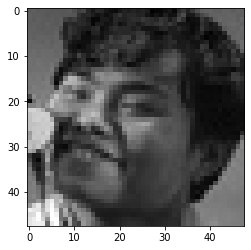

In [ ]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}
img_path = '/content/test/happy/PrivateTest_10470092.jpg'
img = image.load_img(img_path, target_size=(48,48,3))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

prediction = np.argmax(model.predict(x))
print('The predicted emotion is : ' + label_dict[prediction])
my_image = image.load_img(img_path)
plt.imshow(my_image)